# **Trabalho Final - AAS**
## Predição de Índice de Experimentação de Substâncias

### 1. Definição do Problema
Este projeto pretende desenvolver um modelo **supervisionado** para prever se um jovem (ou grupo) apresenta índice de experimentação de substâncias (`Drug_Experimentation`) com base em variáveis socioeconômicas, demográficas e comportamentais. A ideia central é identificar fatores determinantes e compreender o fenômeno, auxiliando assim na formulação de **políticas públicas** ou intervenções de saúde.

O dataset (por exemplo, `Youth_Smoking_Drug.csv`) contém colunas relacionadas a idade, gênero, status socioeconômico, possíveis escores de comportamento, etc. O alvo é uma variável binária indicando experimentação de drogas (`0` ou `1`).




### 2. Importação de Bibliotecas



In [251]:
#!pip install tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
plt.rcParams['figure.figsize'] = (10,6)
import warnings
warnings.filterwarnings('ignore')

### 3. Carregamento e Descrição do Dataset

Aqui, carregamos o arquivo CSV `Youth_Smoking_Drug.csv` (exemplo). Ajuste conforme o seu dataset real.


In [254]:
df = pd.read_csv("dataset.csv")  
df.head()

,Year,Age_Group,Gender,Smoking_Prevalence,Drug_Experimentation,Socioeconomic_Status,Peer_Influence,School_Programs,Family_Background,Mental_Health,Access_to_Counseling,Parental_Supervision,Substance_Education,Community_Support,Media_Influence
0,2024,15-19,Both,18.85,32.40,High,5,Yes,1,5,No,4,No,3,1
1,2024,10-14,Female,34.88,41.57,High,6,Yes,10,5,No,9,Yes,9,3
2,2024,40-49,Both,33.75,42.90,Middle,10,No,9,7,Yes,2,No,10,9
3,2024,25-29,Male,37.71,19.46,Low,5,Yes,2,4,Yes,1,No,10,8
4,2024,15-19,Female,24.61,39.62,Middle,10,No,8,4,Yes,8,No,6,8


#### Info e Estatísticas Descritivas




#### Mostrar o tamanho do dataset

In [258]:
linhas, colunas = df.shape
print("Número de linhas:", linhas)
print("Número de colunas:", colunas)

Número de linhas: 10000
Número de colunas: 15


In [260]:
df.describe()

,Year,Smoking_Prevalence,Drug_Experimentation,Peer_Influence,Family_Background,Mental_Health,Parental_Supervision,Community_Support,Media_Influence
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2022.000500,27.439257,40.150182,5.440100,5.513300,5.469800,5.528000,5.544600,5.506200
std,1.425027,12.975528,17.515917,2.863151,2.865038,2.879326,2.891514,2.870302,2.872836
min,2020.000000,5.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2021.000000,16.160000,24.920000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,2022.000000,27.355000,40.100000,5.000000,6.000000,5.000000,6.000000,6.000000,6.000000
75%,2023.000000,38.672500,55.462500,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,2024.000000,50.000000,69.990000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


### 5. Data Wrangling




Verificar o tipo de dados em cada coluna

In [264]:
df.dtypes

Year                      int64
Age_Group                object
Gender                   object
Smoking_Prevalence      float64
Drug_Experimentation    float64
Socioeconomic_Status     object
Peer_Influence            int64
School_Programs          object
Family_Background         int64
Mental_Health             int64
Access_to_Counseling     object
Parental_Supervision      int64
Substance_Education      object
Community_Support         int64
Media_Influence           int64
dtype: object

In [266]:
print(df.isna().sum())

df.head()

Year                    0
Age_Group               0
Gender                  0
Smoking_Prevalence      0
Drug_Experimentation    0
Socioeconomic_Status    0
Peer_Influence          0
School_Programs         0
Family_Background       0
Mental_Health           0
Access_to_Counseling    0
Parental_Supervision    0
Substance_Education     0
Community_Support       0
Media_Influence         0
dtype: int64


,Year,Age_Group,Gender,Smoking_Prevalence,Drug_Experimentation,Socioeconomic_Status,Peer_Influence,School_Programs,Family_Background,Mental_Health,Access_to_Counseling,Parental_Supervision,Substance_Education,Community_Support,Media_Influence
0,2024,15-19,Both,18.85,32.40,High,5,Yes,1,5,No,4,No,3,1
1,2024,10-14,Female,34.88,41.57,High,6,Yes,10,5,No,9,Yes,9,3
2,2024,40-49,Both,33.75,42.90,Middle,10,No,9,7,Yes,2,No,10,9
3,2024,25-29,Male,37.71,19.46,Low,5,Yes,2,4,Yes,1,No,10,8
4,2024,15-19,Female,24.61,39.62,Middle,10,No,8,4,Yes,8,No,6,8


Remoção de colunas irrelevantes

In [269]:
df = df.drop(columns=['Access_to_Counseling'])

### Converter as variáveis categóricas em variáveis numéricas

In [199]:
df_coded = df.copy()

Variável Age_Group

In [202]:
le_leading_cause = LabelEncoder()
df_coded['Age_Group'] = le_leading_cause.fit_transform(df_coded['Age_Group'])


Variável Gender

In [205]:
le_leading_cause = LabelEncoder()
df_coded['Gender'] = le_leading_cause.fit_transform(df_coded['Gender'])

Variável Socioeconomic_status

In [208]:
le_leading_cause = LabelEncoder()
df_coded['Socioeconomic_Status'] = le_leading_cause.fit_transform(df_coded['Socioeconomic_Status'])

Variável School_Programs

In [211]:
le_leading_cause = LabelEncoder()
df_coded['School_Programs'] = le_leading_cause.fit_transform(df_coded['School_Programs'])

Variável Acess_to_Counseling

In [216]:
le_leading_cause = LabelEncoder()
df_coded['Access_to_Counseling'] = le_leading_cause.fit_transform(df_coded['Access_to_Counseling'])

Variável Substance_Education

In [219]:
le_leading_cause = LabelEncoder()
df_coded['Substance_Education'] = le_leading_cause.fit_transform(df_coded['Substance_Education'])

### Data Visualization


Célula Code: EDA 1

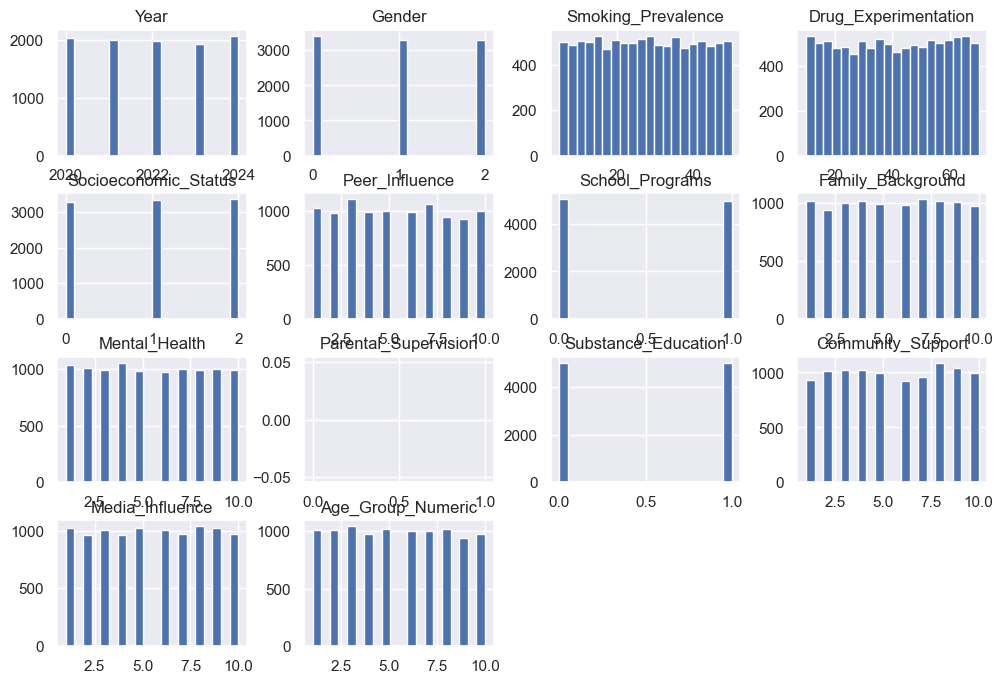

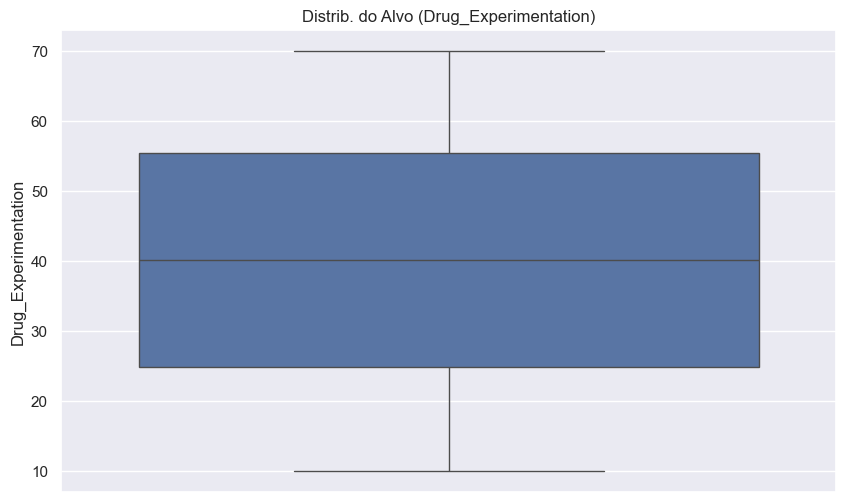

In [121]:
df.hist(bins=20, figsize=(12,8))
plt.show()

# Boxplot do alvo
sns.boxplot(y='Drug_Experimentation', data=df)
plt.title('Distrib. do Alvo (Drug_Experimentation)')
plt.show()

EDA 2 (Correlação)

In [ ]:
# Somente colunas numéricas:
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Heatmap de Correlação (Numéricos)')
plt.show()

EDA 3 (exemplo)

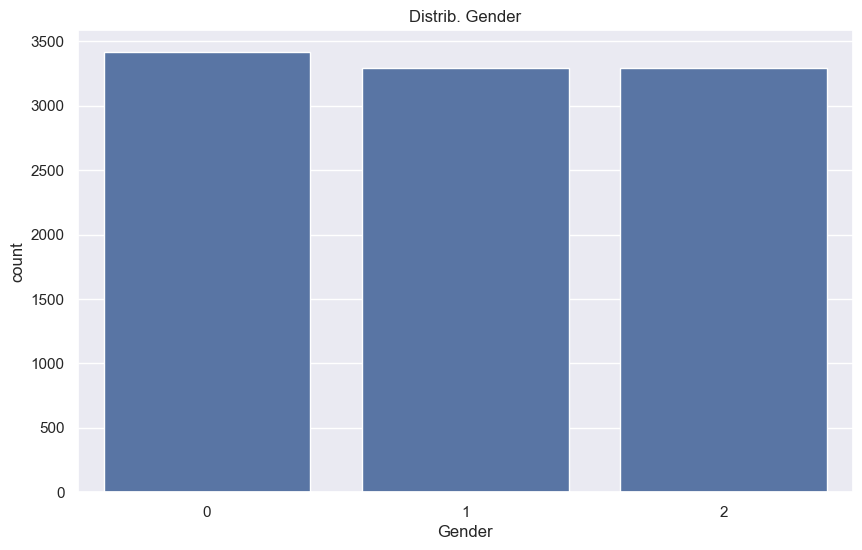

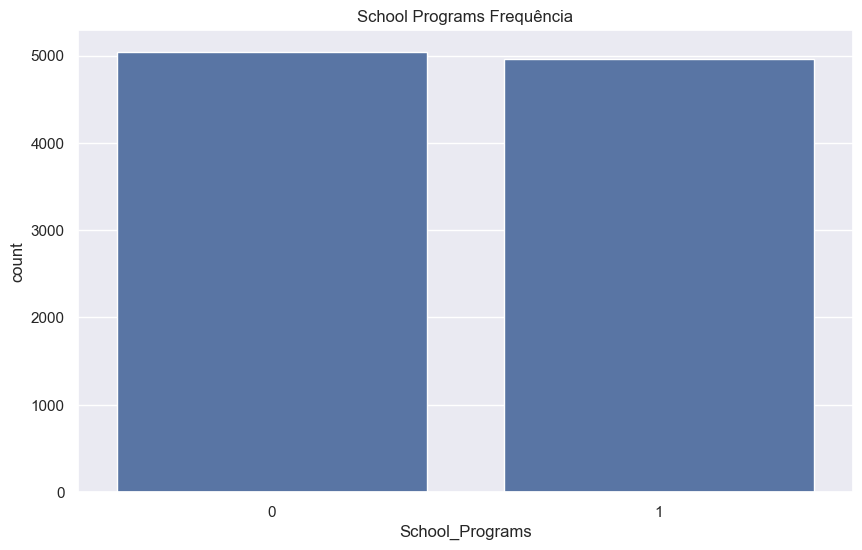

In [127]:
# Relação de colunas categóricas ex: Gender, School_Programs
sns.countplot(x='Gender', data=df)
plt.title('Distrib. Gender')
plt.show()

sns.countplot(x='School_Programs', data=df)
plt.title('School Programs Frequência')
plt.show()


In [294]:
# 1) Definir X, y
target = "Drug_Experimentation"
y = df_coded[target]                 
X = df_coded.drop(target, axis=1)

In [296]:
# Dividir os dados de treino
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [298]:
# Escalar os dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
print("X_train_scaled shape =>", X_train_scaled.shape)
print("X_test_scaled shape  =>", X_test_scaled.shape)
print("y_train shape =>", y_train.shape, "  y_test shape =>", y_test.shape)

X_train_scaled shape => (8000, 14)
X_test_scaled shape  => (2000, 14)
y_train shape => (8000,)   y_test shape => (2000,)


In [300]:
# treinar os modelos
models = {
    "Linear": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "DecisionTree": DecisionTreeRegressor(random_state=7),
    "RandomForest": RandomForestRegressor(random_state=7),
    "SVR": SVR()
}

results_no_tuning = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2   = r2_score(y_test, y_pred)
    results_no_tuning[name] = (rmse, r2)

# Imprimir resultados
for name, (rmse, r2) in results_no_tuning.items():
    print(f"{name} => RMSE: {rmse:.4f}, R2: {r2:.4f}")

Linear => RMSE: 17.3821, R2: -0.0023
KNN => RMSE: 18.9952, R2: -0.1970
DecisionTree => RMSE: 24.7058, R2: -1.0249
RandomForest => RMSE: 17.5537, R2: -0.0222
SVR => RMSE: 17.4669, R2: -0.0121


In [302]:
# treinar e avaliar modelos
models = {
    "Linear": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "DecisionTree": DecisionTreeRegressor(random_state=7),
    "RandomForest": RandomForestRegressor(random_state=7),
    "SVR": SVR()
}

results_no_tuning = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results_no_tuning[name] = (rmse, r2)

print("===== RESULTADOS SEM TUNING =====")
for name, (rmse, r2) in results_no_tuning.items():
    print(f"{name} => RMSE: {rmse:.4f}, R2: {r2:.4f}")

===== RESULTADOS SEM TUNING =====
Linear => RMSE: 17.3821, R2: -0.0023
KNN => RMSE: 18.9952, R2: -0.1970
DecisionTree => RMSE: 24.7058, R2: -1.0249
RandomForest => RMSE: 17.5537, R2: -0.0222
SVR => RMSE: 17.4669, R2: -0.0121


In [304]:
# RandomForest + GridSearchCV
param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [5, 10, None]
}
rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=7),
    param_grid=param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)
rf_grid.fit(X_train_scaled, y_train)

best_rf_grid = rf_grid.best_estimator_
y_pred_rf_grid = best_rf_grid.predict(X_test_scaled)
rmse_rf_grid = np.sqrt(mean_squared_error(y_test, y_pred_rf_grid))
r2_rf_grid = r2_score(y_test, y_pred_rf_grid)

print("\n===== RandomForest + GridSearchCV =====")
print("Melhores parâmetros:", rf_grid.best_params_)
print(f"RMSE: {rmse_rf_grid:.4f}, R2: {r2_rf_grid:.4f}")


===== RandomForest + GridSearchCV =====
Melhores parâmetros: {'max_depth': 5, 'n_estimators': 100}
RMSE: 17.3803, R2: -0.0021


In [306]:
# SVR + RandomizedSearchCV
param_dist = {
    "C": [0.1, 1, 10, 100],
    "gamma": ["scale", "auto", 0.01, 0.1],
    "kernel": ["rbf", "poly"]
}
svr_rand = RandomizedSearchCV(
    SVR(),
    param_distributions=param_dist,
    n_iter=5,
    cv=5,
    scoring="neg_mean_squared_error",
    random_state=7,
    n_jobs=-1
)
svr_rand.fit(X_train_scaled, y_train)

best_svr_rand = svr_rand.best_estimator_
y_pred_svr_rand = best_svr_rand.predict(X_test_scaled)
rmse_svr_rand = np.sqrt(mean_squared_error(y_test, y_pred_svr_rand))
r2_svr_rand = r2_score(y_test, y_pred_svr_rand)

print("\n===== SVR + RandomizedSearchCV =====")
print("Melhores parâmetros:", svr_rand.best_params_)
print(f"RMSE: {rmse_svr_rand:.4f}, R2: {r2_svr_rand:.4f}")


===== SVR + RandomizedSearchCV =====
Melhores parâmetros: {'kernel': 'poly', 'gamma': 0.01, 'C': 1}
RMSE: 17.3648, R2: -0.0003


In [308]:
# Rede Neural
ann = Sequential()
ann.add(Dense(16, activation='relu', input_dim=X_train_scaled.shape[1]))
ann.add(Dense(8, activation='relu'))
# ann.add(Dropout(0.2))  # se quiser
ann.add(Dense(1, activation='linear'))  # saída p/ regressão

ann.compile(optimizer='adam', loss='mse')
history = ann.fit(
    X_train_scaled, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

===== Rede Neural (ANN) =====
RMSE: 17.6459, R2: -0.0330


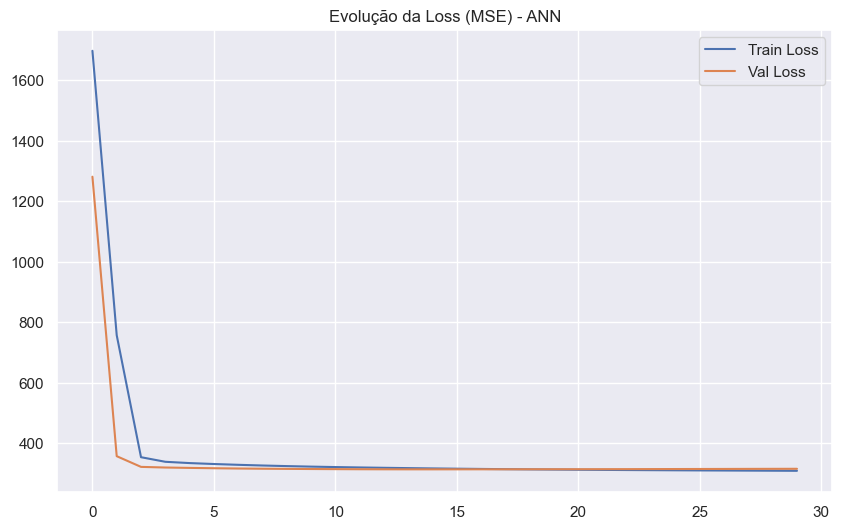

In [310]:
# Avaliar no teste
y_pred_ann = ann.predict(X_test_scaled).ravel()
rmse_ann = np.sqrt(mean_squared_error(y_test, y_pred_ann))
r2_ann = r2_score(y_test, y_pred_ann)

print("\n===== Rede Neural (ANN) =====")
print(f"RMSE: {rmse_ann:.4f}, R2: {r2_ann:.4f}")

# Plot da curva de loss (opcional)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Evolução da Loss (MSE) - ANN")
plt.legend()
plt.show()

In [312]:
print("\n===== COMPARAÇÃO FINAL =====")
# Resultados sem tuning
for name, (rmse, r2) in results_no_tuning.items():
    print(f"{name} (No Tuning) => RMSE: {rmse:.4f}, R2: {r2:.4f}")


===== COMPARAÇÃO FINAL =====
Linear (No Tuning) => RMSE: 17.3821, R2: -0.0023
KNN (No Tuning) => RMSE: 18.9952, R2: -0.1970
DecisionTree (No Tuning) => RMSE: 24.7058, R2: -1.0249
RandomForest (No Tuning) => RMSE: 17.5537, R2: -0.0222
SVR (No Tuning) => RMSE: 17.4669, R2: -0.0121


In [314]:
# Resultados com tuning
print("\nRandomForest + GridSearch => RMSE: {:.4f}, R2: {:.4f}".format(rmse_rf_grid, r2_rf_grid))
print("SVR + RandomSearch => RMSE: {:.4f}, R2: {:.4f}".format(rmse_svr_rand, r2_svr_rand))
print("ANN => RMSE: {:.4f}, R2: {:.4f}".format(rmse_ann, r2_ann))


RandomForest + GridSearch => RMSE: 17.3803, R2: -0.0021
SVR + RandomSearch => RMSE: 17.3648, R2: -0.0003
ANN => RMSE: 17.6459, R2: -0.0330


In [316]:
"""
Conclusões:
-----------
- Observar qual modelo obteve maior R2 e menor RMSE.
- Ver se tuning (GridSearch/RandomSearch) melhorou o desempenho.
- Discutir possíveis overfitting e limitações.
- Apresentar insights sobre 'Drug_Experimentation'.

FIM.
"""

"\nConclusões:\n-----------\n- Observar qual modelo obteve maior R2 e menor RMSE.\n- Ver se tuning (GridSearch/RandomSearch) melhorou o desempenho.\n- Discutir possíveis overfitting e limitações.\n- Apresentar insights sobre 'Drug_Experimentation'.\n\nFIM.\n"